# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sinasc_RO_2019.csv')

df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [5]:

bins = [0, 3, 5, 7, 10]
labels = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

df['APGAR5_categoria'] = pd.cut(df['APGAR5'], bins=bins, labels=labels, right=True)

df[['APGAR5', 'APGAR5_categoria']].head(20)


,APGAR5,APGAR5_categoria
0,10.0,normal
1,9.0,normal
2,10.0,normal
3,10.0,normal
4,10.0,normal
5,10.0,normal
6,10.0,normal
7,10.0,normal
8,9.0,normal
9,10.0,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

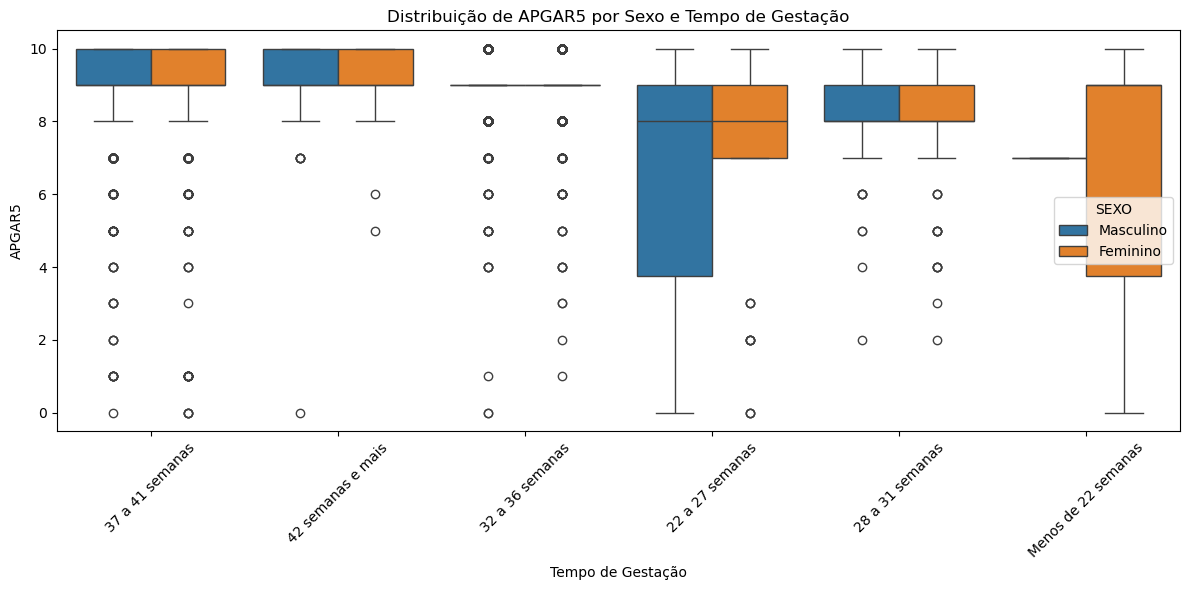

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=df)

plt.title('Distribuição de APGAR5 por Sexo e Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('APGAR5')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [19]:
tabela_cruzada = df.groupby('GESTACAO')['APGAR5'].mean().reset_index()

tabela_cruzada

,GESTACAO,APGAR5
0,22 a 27 semanas,6.623529
1,28 a 31 semanas,7.987654
2,32 a 36 semanas,8.908684
3,37 a 41 semanas,9.224437
4,42 semanas e mais,9.219198
5,Menos de 22 semanas,6.571429


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [22]:
tabela_cruzada['Percentual'] = tabela_cruzada['APGAR5'] / tabela_cruzada['APGAR5'].sum() * 100


tabela_cruzada


,GESTACAO,APGAR5,Percentual
0,22 a 27 semanas,6.623529,13.646933
1,28 a 31 semanas,7.987654,16.457537
2,32 a 36 semanas,8.908684,18.355201
3,37 a 41 semanas,9.224437,19.005770
4,42 semanas e mais,9.219198,18.994974
5,Menos de 22 semanas,6.571429,13.539586


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

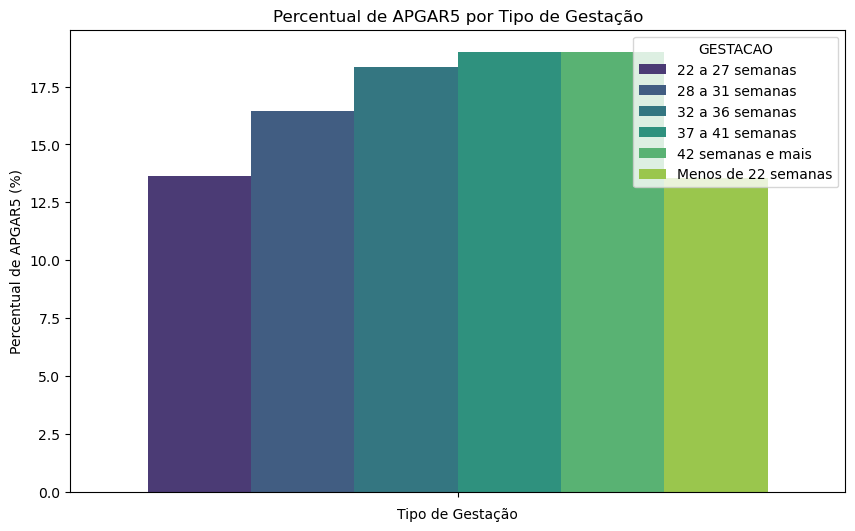

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que você já tenha a tabela_cruzada com o cálculo do percentual
tabela_cruzada['Percentual'] = tabela_cruzada['APGAR5'] / tabela_cruzada['APGAR5'].sum() * 100

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(hue='GESTACAO', y='Percentual', data=tabela_cruzada, palette='viridis')

# Configurar o gráfico
plt.title('Percentual de APGAR5 por Tipo de Gestação')
plt.xlabel('Tipo de Gestação')
plt.ylabel('Percentual de APGAR5 (%)')
plt.xticks(rotation=45)


plt.show()


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

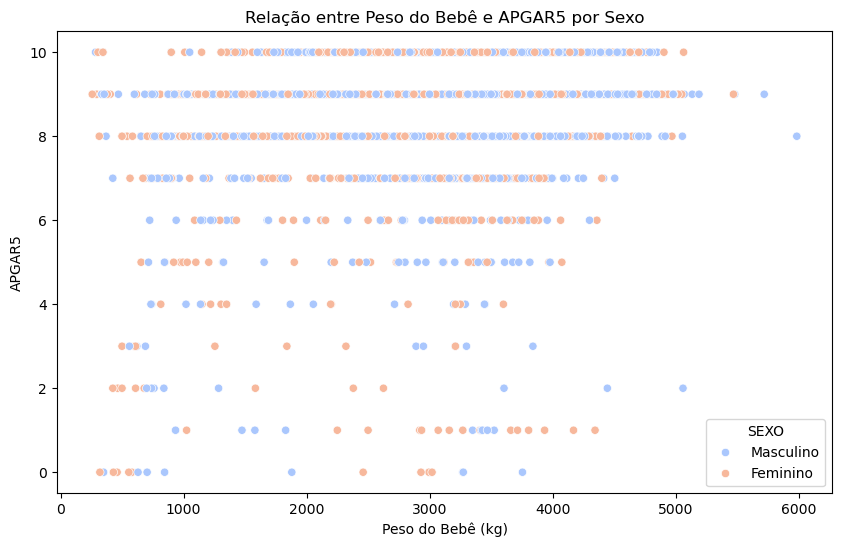

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PESO', y='APGAR5', hue='SEXO', data=df, palette='coolwarm')

# Configurando o gráfico
plt.title('Relação entre Peso do Bebê e APGAR5 por Sexo')
plt.xlabel('Peso do Bebê (kg)')
plt.ylabel('APGAR5')

# Exibindo o gráfico
plt.show()


# Conclusão do Estudo

## 1. Relação entre APGAR5 e Peso do Bebê

Observamos que há uma correlação positiva entre APGAR5 e o peso do bebê. 
Bebês com peso abaixo de 2.500g tendem a ter APGAR5 mais baixo, indicando maior risco ao nascer.


